# Red wine prediction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Reading cvs file

In [4]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking for null values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

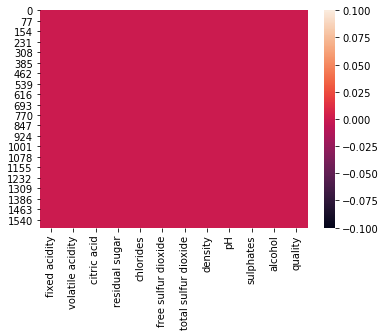

In [9]:
sns.heatmap(df.isnull())

# Checking for data correlation

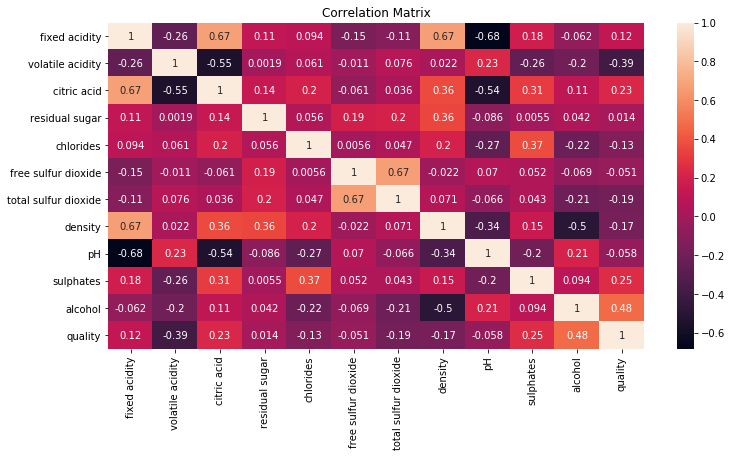

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Feature selection

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = df.drop('quality', axis=1)
y = df['quality']
best_feature = SelectKBest(score_func=f_classif, k=11)
fit = best_feature.fit(x, y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [13]:
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

In [14]:
featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
10,alcohol,115.854797
1,volatile acidity,60.913993
6,total sulfur dioxide,25.478510
9,sulphates,22.273376
2,citric acid,19.690664
7,density,13.396357
0,fixed acidity,6.283081
4,chlorides,6.035639
5,free sulfur dioxide,4.754233
8,pH,4.341764


In [15]:
df.drop(['fixed acidity', 'chlorides', 'free sulfur dioxide', 'pH', 'residual sugar'], axis=1, inplace=True)

In [16]:
df.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,34.0,0.9978,0.56,9.4,5


# Checking if our data is balanced or not

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

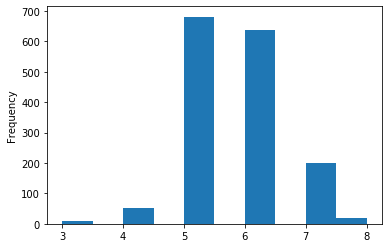

In [17]:
df['quality'].plot.hist()
df['quality'].value_counts()

In [18]:
df['quality'] = np.where((df.quality >= 6), 1, 0)

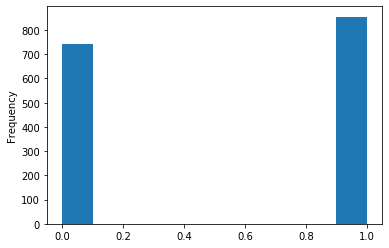

In [19]:
df['quality'].plot.hist()

# Checking for skewness

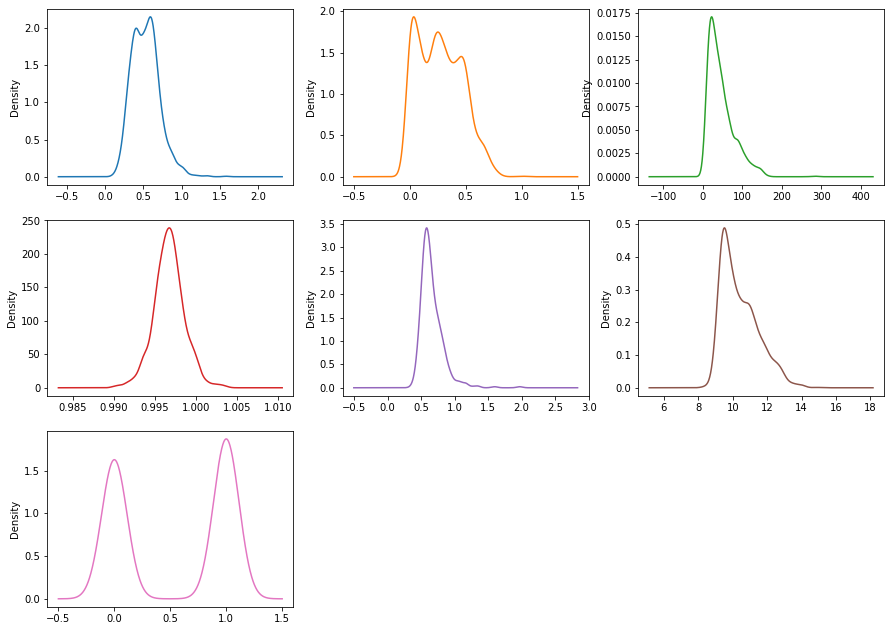

In [20]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False, figsize=(15,11))
plt.show()

In [21]:
df.skew()

volatile acidity        0.671593
citric acid             0.318337
total sulfur dioxide    1.515531
density                 0.071288
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

# Checking for outliers

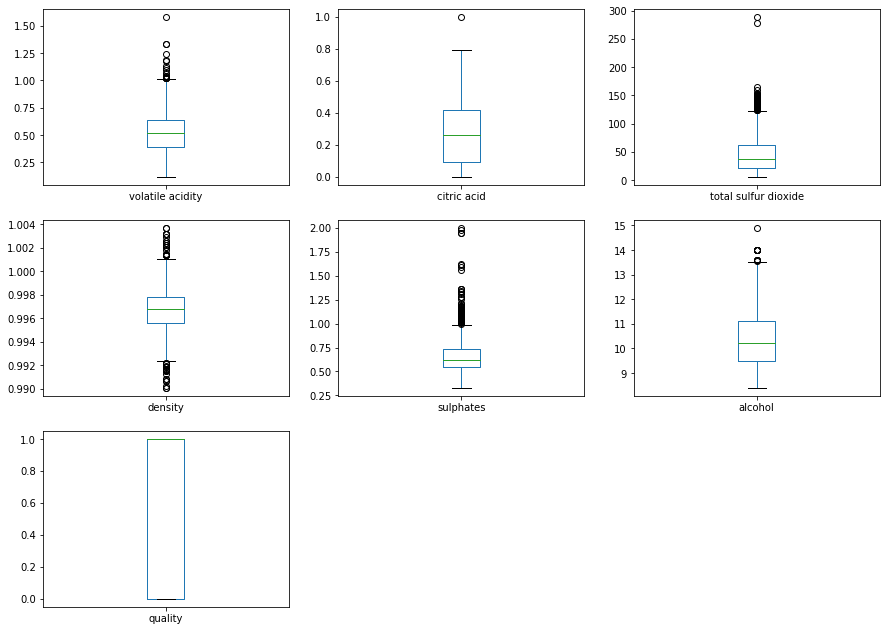

In [22]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, legend=False, figsize=(15,11))
plt.show()

# Removing Outliers

In [23]:
from scipy.stats import zscore

z = np.abs(zscore(df))

df_new = df[ (z < 3).all(axis=1) ]

In [24]:
df.shape

(1599, 7)

In [25]:
df_new.shape

(1524, 7)

# Finding best random state

In [26]:
x = df_new.drop('quality', axis=1)
y = df_new['quality']

In [27]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.7813121272365805 on Random State:  116


# Creating train test split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=116)

In [29]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

78.13121272365805
[[171  65]
 [ 45 222]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       236
           1       0.77      0.83      0.80       267

    accuracy                           0.78       503
   macro avg       0.78      0.78      0.78       503
weighted avg       0.78      0.78      0.78       503

f1 Score: 80.14440433212997


In [30]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

72.56461232604374
[[161  75]
 [ 63 204]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       236
           1       0.73      0.76      0.75       267

    accuracy                           0.73       503
   macro avg       0.72      0.72      0.72       503
weighted avg       0.73      0.73      0.73       503

f1 Score: 74.72527472527474


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

80.51689860834989
[[184  52]
 [ 46 221]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       236
           1       0.81      0.83      0.82       267

    accuracy                           0.81       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.81      0.81      0.80       503

f1 Score: 81.85185185185185


In [31]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

61.82902584493042
[[ 65 171]
 [ 21 246]]
              precision    recall  f1-score   support

           0       0.76      0.28      0.40       236
           1       0.59      0.92      0.72       267

    accuracy                           0.62       503
   macro avg       0.67      0.60      0.56       503
weighted avg       0.67      0.62      0.57       503

f1 Score: 71.92982456140352


In [32]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

77.73359840954275
[[183  53]
 [ 59 208]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       236
           1       0.80      0.78      0.79       267

    accuracy                           0.78       503
   macro avg       0.78      0.78      0.78       503
weighted avg       0.78      0.78      0.78       503

f1 Score: 78.7878787878788


In [33]:
scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  73.49050905953408


In [34]:

# cross validation score for k nearest neighbors

scr = cross_val_score(knn, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  65.09037963761864


In [35]:
# cross validation score for SVC

scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  62.857204486626394


In [36]:
# cross validation score for Gaussian Naive Bayes

scr = cross_val_score(gnb, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  73.0955565142364


In [46]:
# cross validation score for Random Forest Classifier

scr = cross_val_score(rfc, x, y, cv=10)
print("Cross Validation score of Random Forest Classifier: ",scr.mean()*100)

Cross Validation score of Random Forest Classifier:  72.57438940488477


# Hyper parameter tuning

In [37]:

# creating parameter list to pass in GridSearchCV

parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
GCV = GridSearchCV(estimator=gnb, 
                 param_grid=parameters, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [38]:
GCV.best_params_

{'var_smoothing': 4.328761281083062e-05}

In [39]:
mod = GaussianNB(var_smoothing= 4.328761281083062e-05)

mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print('f1_score:',f1_score(y_test, pred)*100)

f1_score: 79.56600361663652


# Plotting AUC ROC curve

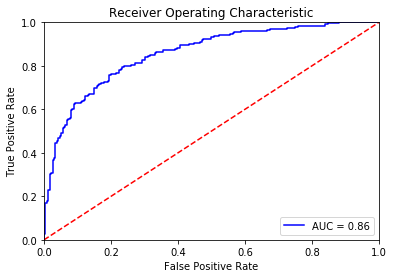

In [40]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Saving the model

In [41]:
import joblib
joblib.dump(mod, 'redwinemodel.pkl')

['redwinemodel.pkl']

# Loading the saved model

In [48]:
model = joblib.load('redwinemodel.pkl')
prediction = model.predict(x_test)
print('f1 score:',f1_score(y_test, prediction)*100)

f1 score: 79.56600361663652


In [49]:
prediction = pd.DataFrame(prediction)

In [50]:
prediction.to_csv('result.csv')
prediction

,0
0,1
1,1
2,0
3,1
4,0
...,...
498,0
499,0
500,0
501,1
